# CSC 412 - Titanic
Abayomi Shosilva\
Alexandria Thorpe\
Harry Chen

Using the Titanic passenger survival data, we want to train three machine learning models to have it predict whether a passenger will survive or not, given the data we have on each passenger. The data we have on each passenger includes 

<ul>
    <li>PassengerId - assigned unique identifier to each passenger</li>
    <li>Survived - whether a passenger survived or not</li>
    <li>Pclass - passenger class</li>
    <li>Name - name of the passenger</li>
    <li>Sex - gender of the passenger</li>
    <li>Age - age of the passenger</li>
    <li>SibSp - ratio of sibling count / spouses count on board (# of siblings /spouses)</li>
    <li>Parch - ratio of parent count / children on board (# of parents / children)</li>
    <li>Ticket - ticket number</li>
    <li>Fare - cost of the ticket to get onboard</li>
    <li>Cabin - cabin of titanic the passenger stayed in</li>
    <li>Embarked - Location the passenger embarked from</li>
</ul>
 
 Before we even run any processing on this data, we believe there are specific indicators that will heavily influence the survival of a passenger. We believe passenger class and the fare cost will heavily determine who survived versus who did not. Richer passengers who have a first class ticket obviously paid more in fare and thus, probably had higher priority on lifeboats. 
    

First, we import all necessary libraries and modules. These are used for processing the data and for running the machine learning algorithms on that data.

In [16]:
# pandas is used to load and manipulate data and for One-Hot Encoding
import pandas as pd
# Import the modules needed
import numpy as np # data manipulation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn import preprocessing

#For decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression #For Logistic Regression
from sklearn.neighbors import KNeighborsClassifier #For K Nearest Neighbors
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Next, we read in the data from the titanic.csv file. We print the first few lines of this dataset and 

In [4]:
df = pd.read_csv('titanic.csv', header=0)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


We want to see how many passengers/records in this dataset to see how much data we have to work with.

In [8]:
print('There are '+ str(len(df)) + ' records in this dataset.')

There are 891 records in this dataset.


Looking through the dataset, we believe there are a few columns in the dataset that will not add any value when we use it to train and test our models. This includes ```PassengerId``` and the ```Name``` column. ```PassengerId``` is an assigned unique identifier given to each passenger and ```Name``` is the actual name of the passenger. These fields do not provide any useful data in determining whether the passenger survived or not. We will remove these columns from our dataset. 

In [9]:
df.drop('PassengerId', axis=1, inplace=True) # removing "PassengerId" as a column from the data
df.drop('Name', axis=1, inplace=True) # removing "Name" as a column from the data
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  
0   NaN        S  
1   C85        C  
2   NaN        S  
3  C123        S  
4   NaN        S  


After removing the unnecessary fields from our data, we want to get to know our data better. We want to know what values are in each column and we want to know if there are any rows that have missing values for columns. To do this, we will look through all columns and check for their unique values.

In [10]:
columns = [
    'Survived',
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Ticket',
    'Fare',
    'Cabin',
    'Embarked'
]

for key in columns:
    print("Unique values for " + key + ": ")
    print(df[key].unique())
    print("\n\n")

Unique values for Survived: 
[0 1]



Unique values for Pclass: 
[3 1 2]



Unique values for Sex: 
['male' 'female']



Unique values for Age: 
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]



Unique values for SibSp: 
[1 0 3 4 2 5 8]



Unique values for Parch: 
[0 1 2 5 3 4 6]



Unique values for Ticket: 
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865

After printing the unique values for all columns, we see there are ```nan``` values in the ```Age```, ```Cabin```, ```Embarked``` columns for a few rows. This indicates that there are missing values for those columns in a few of the rows. We will either need to do some processing on the rows missing values for these columns or we will have to exclude these rows from training and testing for our models. To solve the missing data problem in these columns, we will do some processing on it. 

We will create booleans for each of the ```Embark``` points. This includes S, C, and Q within our dataset. S represents Southampton (England), C represents Cherbourg (France), and Q represents Queenstown (Ireland). 

For ```Cabin```, since there are missing values, indicating that some passengers did not have cabins for their stay, we will turn this into a boolean to indicate whether or not the passenger had a cabin or not. 

As for rows that has a missing ```Age``` column, we will assign 100 
to it.

We will also create a boolean value of ```Sex```. ```Sex``` will either 1 for male and 0 for female after this.


In [11]:
label = preprocessing.LabelEncoder();
df['Embarked'] = label.fit_transform(df['Embarked']) #Boolean for whether embarked or not
df['Sex'] = label.fit_transform(df['Sex']) #Boolean for whether male or not
df['Cabin'] = label.fit_transform(df['Cabin']) #Boolean for whether or not someone has a cabin

#Fill in missing ages with 100
df['Age'].fillna(100,inplace=True)

print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    1  22.0      1      0         A/5 21171   7.2500   
1         1       1    0  38.0      1      0          PC 17599  71.2833   
2         1       3    0  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1    0  35.0      1      0            113803  53.1000   
4         0       3    1  35.0      0      0            373450   8.0500   

   Cabin  Embarked  
0    147         2  
1     81         0  
2    147         2  
3     55         2  
4    147         2  


Now that we're done with processing our data, we need to determine our X and y with regard to our data. Since we want to predict whether a passenger will survive or not, the ```Survived``` column will be our dependent variable and the rest will be our indepedent variables. 

In [18]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
y = df['Survived']

After determining our X and y variables, we want to split our data up into a training set and a testing set. One will be used to train our models and the rest will be used to test whether our models can reliablely predict the survival of a passenger. We will do a 80/20 split in which 80% of our rows will be used for training while the rest of the 20% will be used for testing our models.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 0)

The first model we will run our test set through is the Decision Tree model. We believe Decision Tree to be an ideal model for this kind of prediction as it is a classification algorithm and we want to classify our passengers as survived or not. 

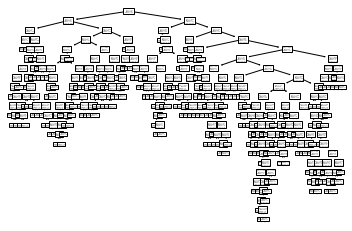

In [22]:
#First we apply Decision Tree (Model 1)
model1 = tree.DecisionTreeClassifier().fit(X.values, y.values)
y_pred = model1.predict(X_test)

#Plot Decision Tree (Model 1)
tree.plot_tree(model1)
plt.show()

After running our model and generating a Decision Tree with our training set, we will calculate the accuracy of it against our test set.

In [23]:
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred))

Decision Tree Accuracy:  0.9888268156424581


TODO: ENTER ANALYSIS FOR DECISION TREE

The second model we will run is the Logistic Regression model. We believe Logistic Regression to be good model to train with our data because it maps results to a binary value of either 0 or 1. Our possible outputs for this dataset is either the passenger survived or not, 1 indicating they survived and 0 indicating they did not. Thus, Logistic Regression sounds like it will work well with our goals.

In [24]:
model2 = LogisticRegression(max_iter = 2000).fit(X_train, y_train)
y_pred = model2.predict(X_test)

After generating our Logistic Regression model using our training set, we want to run against our test set and measure its accuracy score. We also want to look at its ROC curve and its AUC score to see how our model performed on the test set. 

Logistic Regression Accuracy:  0.7988826815642458


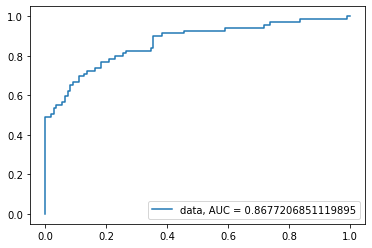

In [25]:
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))
y_pred_proba = model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, AUC = " + str(auc))
plt.legend(loc = 4)
plt.show()

TODO: ENTER Analysis of Logistic Regression 

The third model we will run is the K-Nearest Neighbors model. TODO: Enter why we chose this model cause im not too familiar with it

In [26]:
model3 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred = model3.predict(X_test)

After training our K-Nearest Neighbors model, we will run it against our test set to see how well it performed.

In [27]:
print("K-Nearest Neighbors Accuracy: ", accuracy_score(y_test, y_pred))


K-Nearest Neighbors Accuracy:  0.7486033519553073


EXPLAIN results